In [3]:
%pip install pandas 
%pip install matplotlib 
%pip install seaborn 
%pip install numpy 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('DatosSeguros.csv')
df.head()

,edad,sexo,imc,hijos,fumador,region,valor_seguro
0,19,F,27.90,0,yes,Caribe,16884.9240
1,19,F,27.90,0,yes,Caribe,16884.9240
2,19,F,27.90,0,yes,Caribe,16884.9240
3,18,M,33.77,1,no,Cundinamarca,1725.5523
4,28,M,33.00,3,no,Cundinamarca,4449.4620


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1349 non-null   int64  
 1   sexo          1349 non-null   object 
 2   imc           1347 non-null   float64
 3   hijos         1349 non-null   int64  
 4   fumador       1347 non-null   object 
 5   region        1349 non-null   object 
 6   valor_seguro  1349 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.9+ KB


In [7]:
#Datos nulos
df.isnull().sum()

edad            0
sexo            0
imc             2
hijos           0
fumador         2
region          0
valor_seguro    0
dtype: int64

In [8]:
df = df.dropna()
df.isnull().sum()

edad            0
sexo            0
imc             0
hijos           0
fumador         0
region          0
valor_seguro    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1345 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1345 non-null   int64  
 1   sexo          1345 non-null   object 
 2   imc           1345 non-null   float64
 3   hijos         1345 non-null   int64  
 4   fumador       1345 non-null   object 
 5   region        1345 non-null   object 
 6   valor_seguro  1345 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 84.1+ KB


In [10]:
df.duplicated().sum()

12

In [11]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1333 entries, 0 to 1347
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1333 non-null   int64  
 1   sexo          1333 non-null   object 
 2   imc           1333 non-null   float64
 3   hijos         1333 non-null   int64  
 4   fumador       1333 non-null   object 
 5   region        1333 non-null   object 
 6   valor_seguro  1333 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.3+ KB


In [14]:
rangos=[17,28,38,48,58,68]
nombre_rango=['A','B','C','D','E']

In [15]:
df['Rango_Edad']=pd.cut(df['edad'],rangos,labels=nombre_rango)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1333 entries, 0 to 1347
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   edad          1333 non-null   int64   
 1   sexo          1333 non-null   object  
 2   imc           1333 non-null   float64 
 3   hijos         1333 non-null   int64   
 4   fumador       1333 non-null   object  
 5   region        1333 non-null   object  
 6   valor_seguro  1333 non-null   float64 
 7   Rango_Edad    1333 non-null   category
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 84.8+ KB
None
   edad sexo     imc  hijos fumador        region  valor_seguro Rango_Edad
0    19    F  27.900      0     yes        Caribe   16884.92400          A
3    18    M  33.770      1      no  Cundinamarca    1725.55230          A
4    28    M  33.000      3      no  Cundinamarca    4449.46200          A
5    33    M  22.705      0      no     Antioquia   21984.47061          B
6  

In [16]:
df.describe()

,edad,imc,hijos,valor_seguro
count,1333.000000,1333.000000,1333.000000,1333.000000
mean,39.195049,30.652097,1.092273,13261.908454
std,14.052008,6.097609,1.205484,12093.507648
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4738.268200
50%,39.000000,30.360000,1.000000,9377.904700
75%,51.000000,34.675000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


array([[<Axes: title={'center': 'edad'}>,
        <Axes: title={'center': 'imc'}>],
       [<Axes: title={'center': 'hijos'}>,
        <Axes: title={'center': 'valor_seguro'}>]], dtype=object)

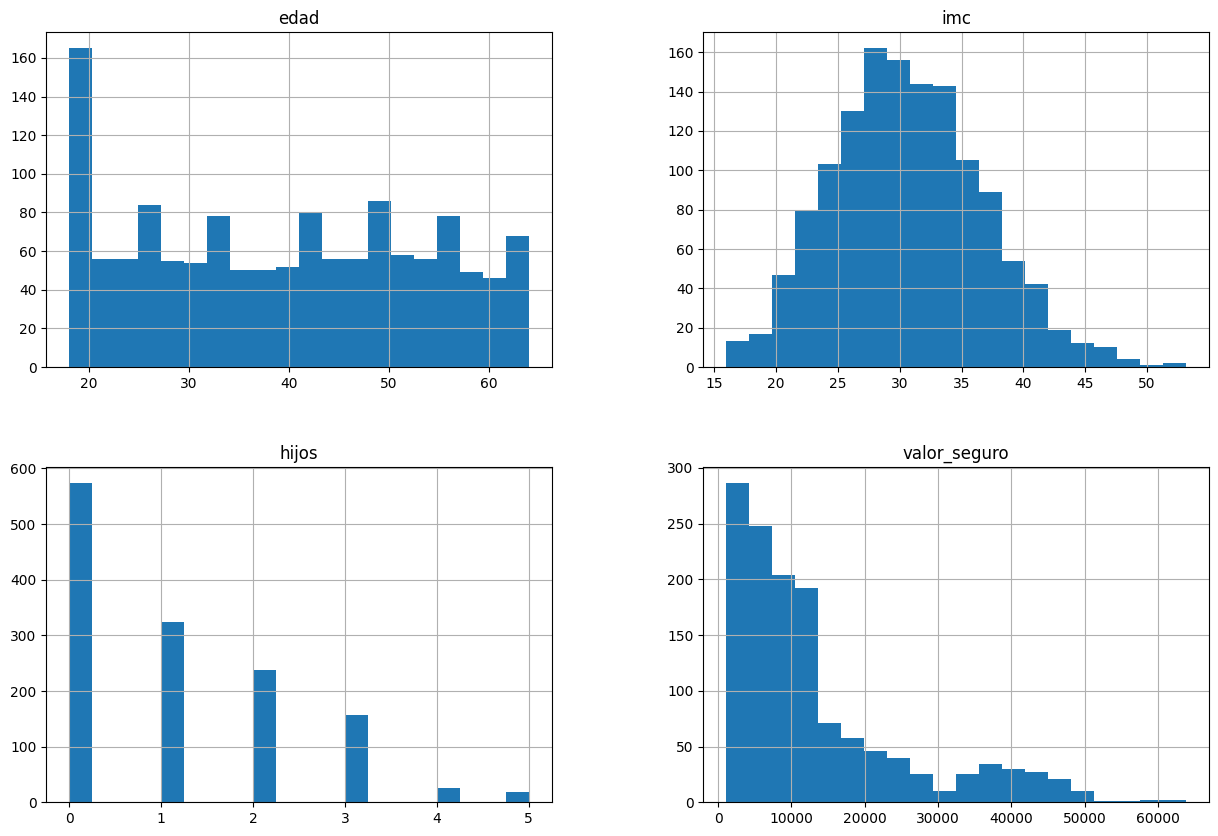

In [18]:
df.hist(bins=20,figsize=(15,10))

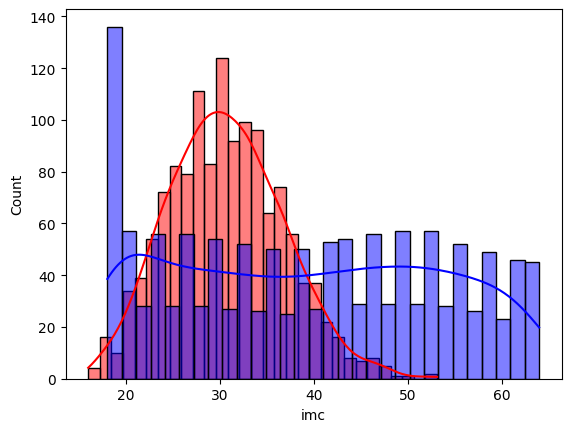

In [27]:
sns.histplot(df.imc,color="r",bins=30,kde=True)
sns.histplot(df.edad,color="b",bins=30,kde=True)
plt.show()

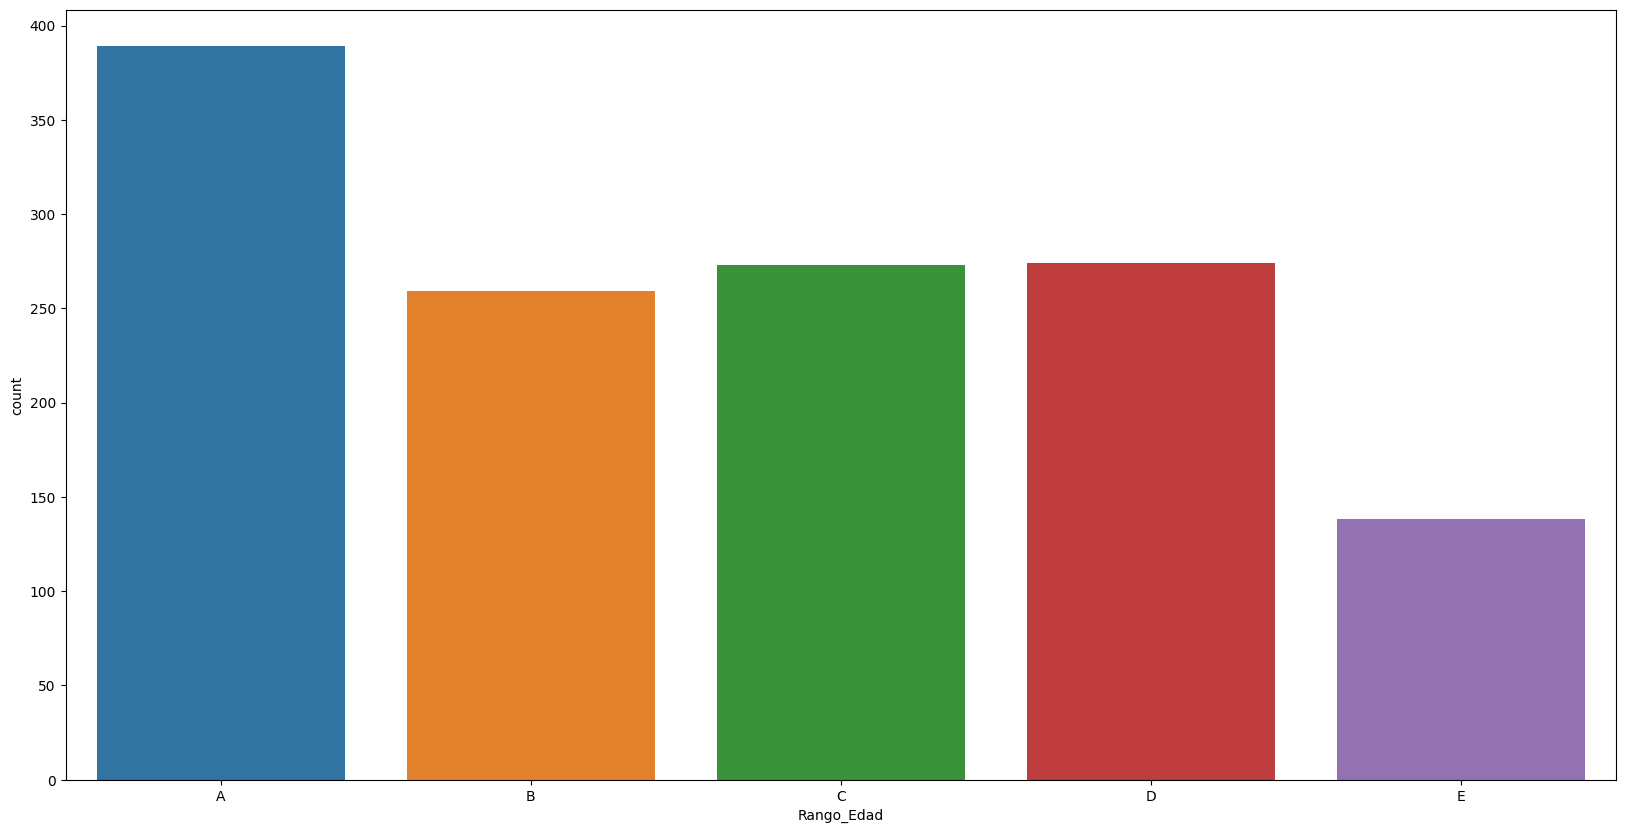

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(data = df, x='Rango_Edad')
plt.show()

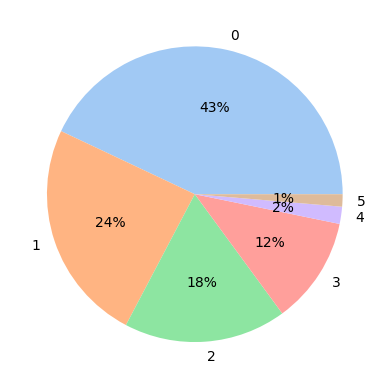

In [22]:
total_hijos = df['hijos'].groupby(df['hijos']).count()
etiquetas = [0,1,2,3,4,5]
colors = sns.color_palette('pastel')[0:6]
plt.pie(total_hijos, labels = etiquetas, colors = colors,
autopct='%.0f%%')
plt.show()


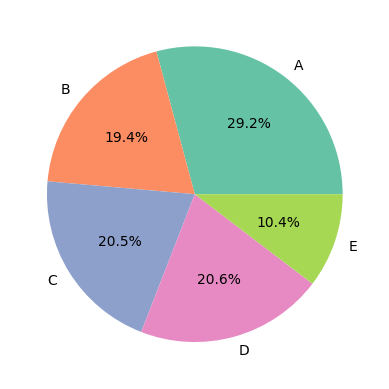

In [23]:
total_rango_edad = df['Rango_Edad'].groupby(df['Rango_Edad']).count()
labels = ["A", "B", "C", "D", "E"]
colors = sns.color_palette('Set2')[0:5]
plt.pie(total_rango_edad, labels = labels, colors =
colors, autopct='%.1f%%')
plt.show()


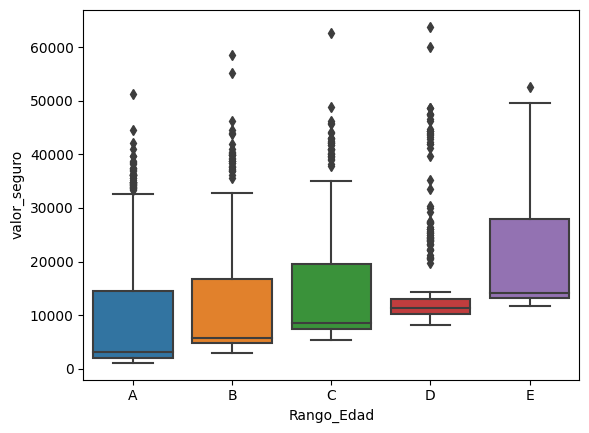

In [24]:
Redad_valor = sns.boxplot(x=df["Rango_Edad"], y=df["valor_seguro"])

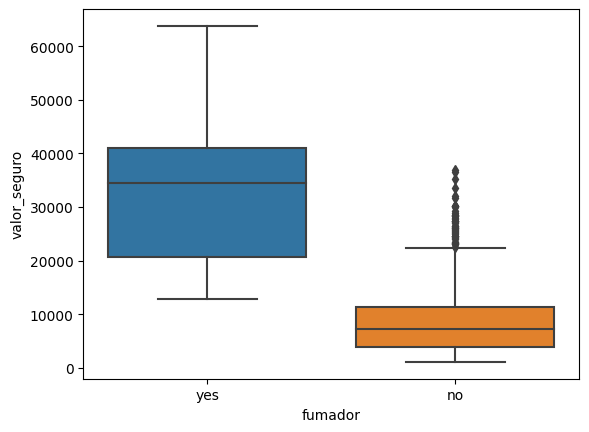

In [28]:
fumador_valor = sns.boxplot(x=df["fumador"], y=df["valor_seguro"])

In [ ]:
sns.pairplot(df)
plt.show